# 결정 트리(Decision Tree)

* 분류와 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측
* **if-then-else** 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을 수록 복잡한 모델
* 결정 트리 장점
  * 이해와 해석이 쉽다
  * 시각화가 용이하다
  * 많은 데이터 전처리가 필요하지 않다
  * 수치형과 범주형 데이터 모두를 다룰 수 있다
  * ...

In [1]:
import pandas as pd
import numpy as np
import graphviz
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])

In [2]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

## 분류를 위한 데이터

### 붓꽃 데이터

In [3]:
iris = load_iris()

In [4]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 와인 데이터

In [5]:
wine = load_wine()

In [6]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df["target"] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### 유방암 데이터

In [7]:
cancer = load_breast_cancer()

In [8]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df["target"] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## 회귀를 위한 데이터

### 보스턴 주택 가격 데이터

In [9]:
boston = load_boston()

In [10]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df["TARGET"] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### 당뇨병 데이터

In [11]:
diabetes = load_diabetes()

In [12]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df["target"] = diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


## 분류 - `DecisionTreeClassifier()`

* `DecisionTreeClassifier`는 분류를 위한 결정트리 모델
* 두개의 배열 X, y를 입력 받음
  * X는 [n_samples, n_features] 크기의 데이터 특성 배열
  * y는 [n_samples] 크기의 정답 배열

In [13]:
X = [[0, 0], [1, 1]]
y = [0, 1]

model = tree.DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [14]:
model.predict([[2., 2.]])

array([1])

In [15]:
model.predict_proba([[2., 2.]])

array([[0., 1.]])

### 붓꽃 데이터 학습

#### 교차검증

##### 전처리 없이 학습

In [16]:
model = DecisionTreeClassifier()

In [17]:
cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

{'fit_time': array([0.00049305, 0.00041199, 0.00034881, 0.00040793, 0.00080681]),
 'score_time': array([0.00018096, 0.00027299, 0.00013423, 0.0001421 , 0.0001862 ]),
 'test_score': array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])}

##### 전처리 후 학습
* 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

In [18]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [19]:
cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

{'fit_time': array([0.00103283, 0.00061107, 0.00058389, 0.00042486, 0.00042129]),
 'score_time': array([0.00015211, 0.00014973, 0.00014997, 0.00012183, 0.00012279]),
 'test_score': array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])}

#### 학습된 결정 트리 시각화

In [20]:
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [21]:
r = tree.export_text(decision_tree=model,
                    feature_names=iris.feature_names)
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



##### plot_tree를 사용한 시각화

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

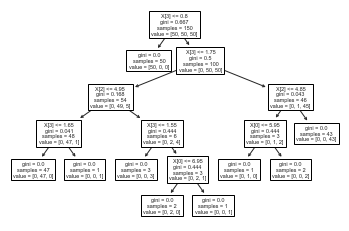

In [22]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

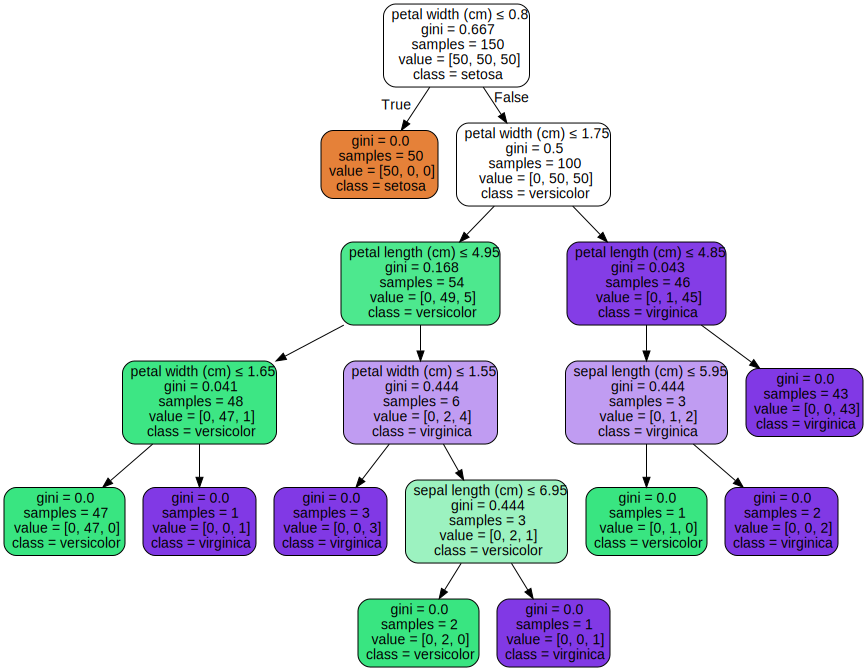

In [23]:
dot_data = tree.export_graphviz(decision_tree=model,
                               feature_names=iris.feature_names,
                               class_names=iris.target_names,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

In [24]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

##### 결정 경계 시각화

(0.0, 7.88, -0.9, 3.4800000000000044)

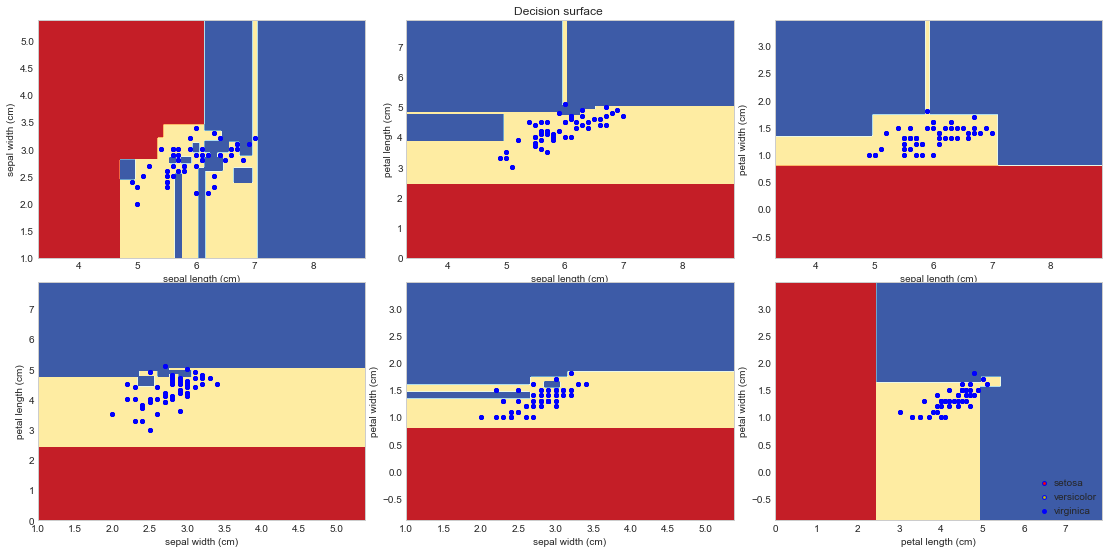

In [25]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([
    [0, 1], [0, 2], [0, 3],
    [1, 2], [1, 3], [2, 3]
]):

    X = iris.data[:, pair]
    y = iris.target

    model = DecisionTreeClassifier()
    model = model.fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step),
        np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == 1)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
            cmap=plt.cm.RdYlBu, edgecolors="b", s=15
        )

plt.suptitle("Decision surface")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")

### 와인 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [26]:
model = DecisionTreeClassifier()

In [27]:
cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

{'fit_time': array([0.00053   , 0.00099492, 0.00061107, 0.00101495, 0.00080705]),
 'score_time': array([0.00013208, 0.00018287, 0.00012898, 0.00040603, 0.00017905]),
 'test_score': array([0.94444444, 0.80555556, 0.94444444, 0.91428571, 0.85714286])}

##### 전처리 후 학습

In [28]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [29]:
cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

{'fit_time': array([0.00114107, 0.00091696, 0.00089192, 0.00070405, 0.00079393]),
 'score_time': array([0.00015092, 0.00016618, 0.0001688 , 0.00013399, 0.00014901]),
 'test_score': array([0.94444444, 0.83333333, 0.86111111, 0.91428571, 0.85714286])}

#### 학습된 결정 트리 시각화

In [30]:
model = DecisionTreeClassifier()
model.fit(wine.data, wine.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [31]:
r = tree.export_text(decision_tree=model,
                    feature_names=wine.feature_names)
print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- ash <= 2.45
|   |   |   |   |--- class: 1
|   |   |   |--- ash >  2.45
|   |   |   |   |--- class: 2
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- color_intensity <= 4.06
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- color_intensity >  4.06
|   |   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- color_intensity <= 3.61
|   |   |   |--- class: 1
|   |   |--- color_intensity >  3.61
|   |   |   |--- class: 2
|   |--- flavanoids >  2.17
|   |   |--- color_intensity <= 3.

##### plot_tree를 사용한 시각화

[Text(189.42631578947368, 199.32, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(114.53684210526316, 163.07999999999998, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(70.48421052631579, 126.83999999999999, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(35.242105263157896, 90.6, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(17.621052631578948, 54.359999999999985, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(52.863157894736844, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(105.72631578947369, 90.6, 'X[2] <= 2.45\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(88.10526315789474, 54.359999999999985, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(123.34736842105264, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(158.58947368421053, 126.83999999999999, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61

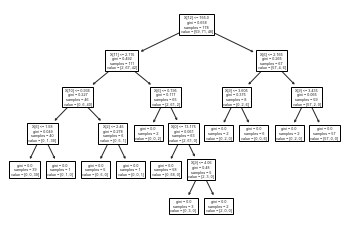

In [32]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

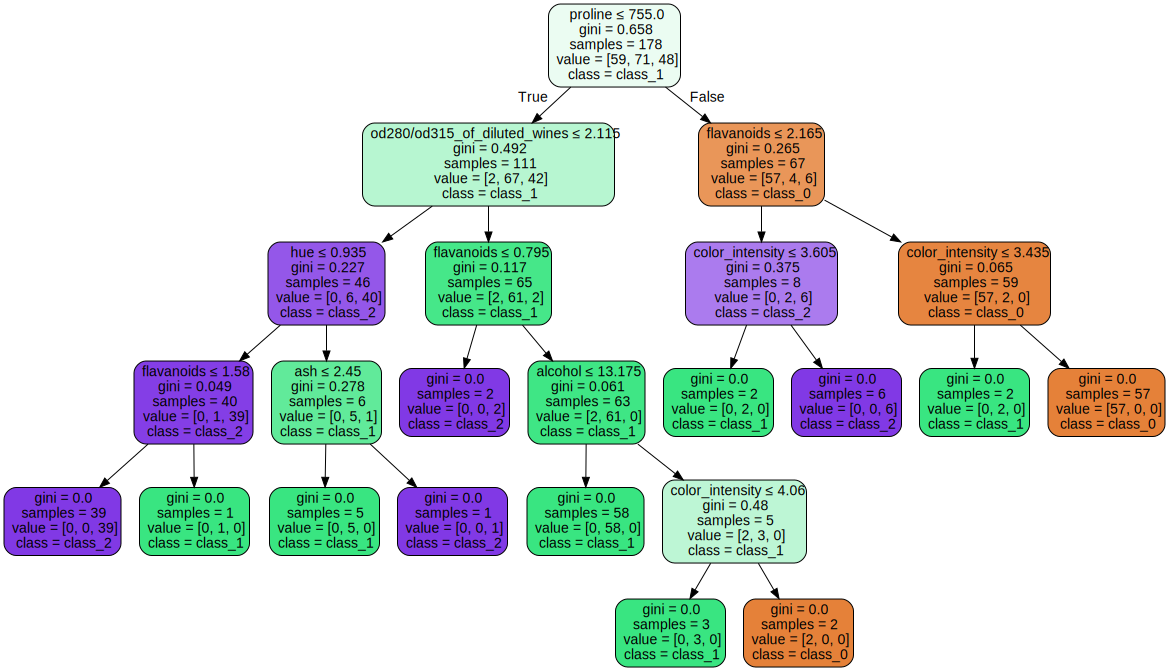

In [33]:
dot_data = tree.export_graphviz(decision_tree=model,
                               feature_names=wine.feature_names,
                               class_names=wine.target_names,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

In [34]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

##### 결정 경계 시각화

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

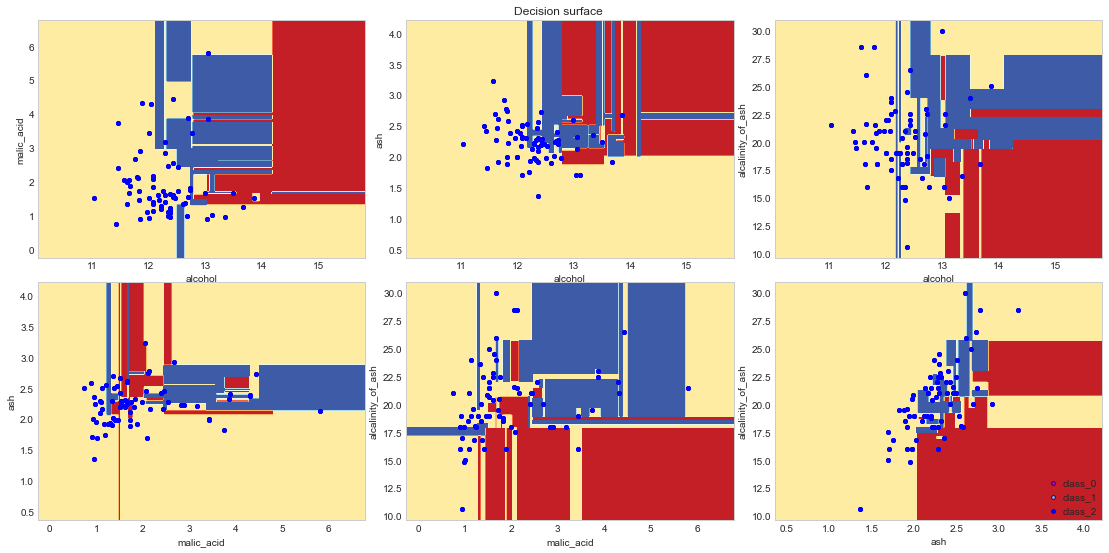

In [35]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([
    [0, 1], [0, 2], [0, 3],
    [1, 2], [1, 3], [2, 3]
]):

    X = wine.data[:, pair]
    y = wine.target

    model = DecisionTreeClassifier()
    model = model.fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step),
        np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(wine.feature_names[pair[0]])
    plt.ylabel(wine.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == 1)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
            cmap=plt.cm.RdYlBu, edgecolors="b", s=15
        )

plt.suptitle("Decision surface")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")

### 유방암 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [36]:
model = DecisionTreeClassifier()

In [37]:
cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

{'fit_time': array([0.00333834, 0.00396895, 0.00433612, 0.0046041 , 0.00516105]),
 'score_time': array([0.00014997, 0.0001862 , 0.00029302, 0.0003109 , 0.00038004]),
 'test_score': array([0.90350877, 0.92982456, 0.92982456, 0.95614035, 0.91150442])}

##### 전처리 후 학습

In [38]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [39]:
cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

{'fit_time': array([0.00629497, 0.00474191, 0.004812  , 0.00463796, 0.00614119]),
 'score_time': array([0.00031018, 0.00030112, 0.00028586, 0.00026083, 0.00039291]),
 'test_score': array([0.9122807 , 0.90350877, 0.9122807 , 0.92982456, 0.90265487])}

#### 학습된 결정 트리 시각화

In [40]:
model = DecisionTreeClassifier()
model.fit(cancer.data, cancer.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [41]:
r = tree.export_text(decision_tree=model)
print(r)

|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.14
|   |   |--- feature_29 <= 0.06
|   |   |   |--- class: 0
|   |   |--- feature_29 >  0.06
|   |   |   |--- feature_13 <= 38.60
|   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |--- feature_8 <= 0.18
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_8 >  0.18
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_13 >  38.60
|   |   |   |   |--- feature_25 <= 0.08
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_25 >  0.08
|   |   |   |   |   |--- feature_13 <= 39.15
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1

##### plot_tree를 사용한 시각화

[Text(204.01875, 203.85, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(125.55000000000001, 176.67000000000002, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(57.54375, 149.49, 'X[29] <= 0.055\ngini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(47.081250000000004, 122.31, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(68.00625000000001, 122.31, 'X[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [4, 328]'),
 Text(41.85, 95.13, 'X[14] <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [2, 317]'),
 Text(20.925, 67.94999999999999, 'X[8] <= 0.176\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(10.4625, 40.77000000000001, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(31.387500000000003, 40.77000000000001, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(62.775000000000006, 67.94999999999999, 'X[21] <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [1, 311]'),
 Text(52.3125, 40.77000000000001, 'gini = 0.0\nsamples = 292\nvalue 

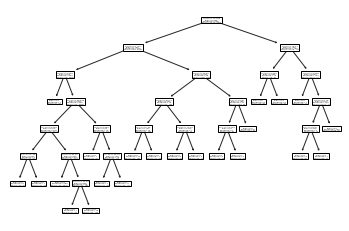

In [42]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

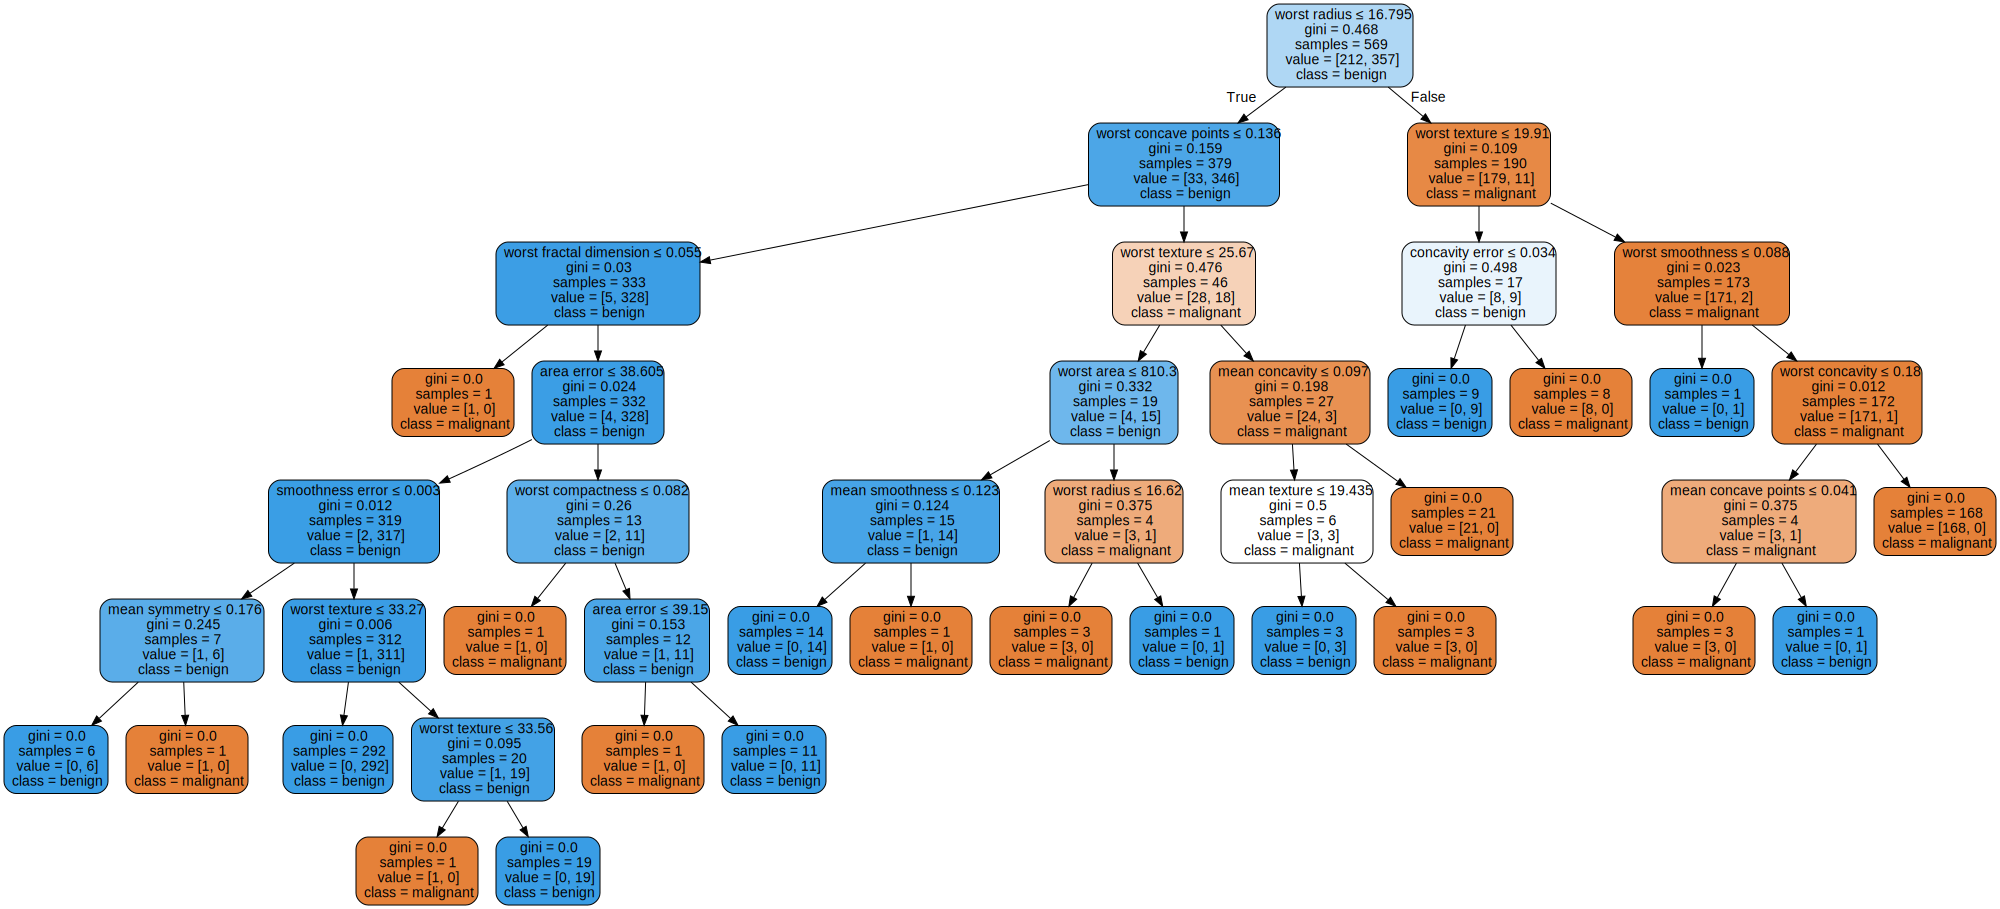

In [43]:
dot_data = tree.export_graphviz(decision_tree=model,
                               feature_names=cancer.feature_names,
                               class_names=cancer.target_names,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

In [44]:
n_classes = 2
plot_colors = "ryb"
plot_step = 0.02

##### 결정 경계 시각화

(5.981, 29.10099999999951, 142.5, 2501.980000001207)

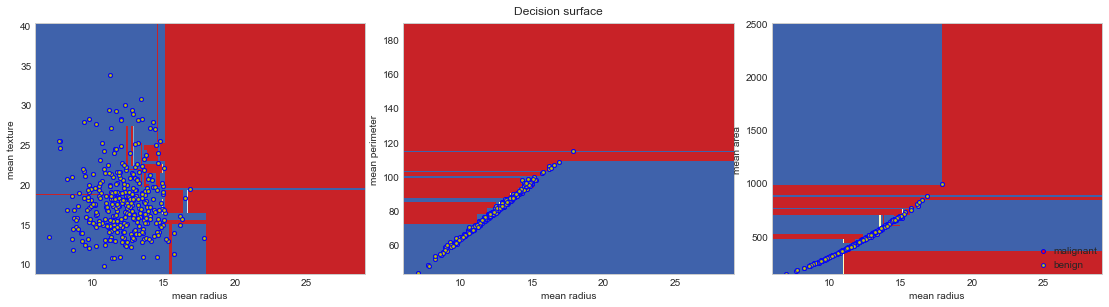

In [45]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([
    [0, 1], [0, 2], [0, 3]
]):

    X = cancer.data[:, pair]
    y = cancer.target

    model = DecisionTreeClassifier()
    model = model.fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step),
        np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(cancer.feature_names[pair[0]])
    plt.ylabel(cancer.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == 1)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
            cmap=plt.cm.RdYlBu, edgecolors="b", s=15
        )

plt.suptitle("Decision surface")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")

##### 하이퍼파리미터를 변경해 보면서 회귀식 시각화

(5.981, 29.10099999999951, 142.5, 2501.980000001207)

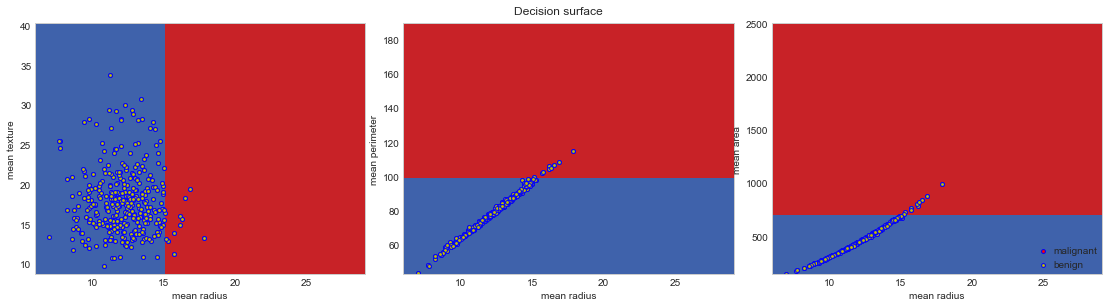

In [46]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([
    [0, 1], [0, 2], [0, 3]
]):

    X = cancer.data[:, pair]
    y = cancer.target

    model = DecisionTreeClassifier(max_depth=2)
    model = model.fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step),
        np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(cancer.feature_names[pair[0]])
    plt.ylabel(cancer.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == 1)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
            cmap=plt.cm.RdYlBu, edgecolors="b", s=15
        )

plt.suptitle("Decision surface")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")

## 회귀 - `DecisionTreeRegressor()`

### 보스턴 주택 가격 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [47]:
model = DecisionTreeRegressor()

In [48]:
cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

{'fit_time': array([0.02355695, 0.03727198, 0.02686   , 0.02042818, 0.01460791]),
 'score_time': array([0.00705099, 0.00226402, 0.00340986, 0.00398397, 0.00617099]),
 'test_score': array([ 0.61843131,  0.42436044,  0.65394157,  0.39577015, -1.83896374])}

##### 전처리 후 학습

In [49]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

In [50]:
cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

{'fit_time': array([0.010216  , 0.00259995, 0.00307608, 0.00356197, 0.00338507]),
 'score_time': array([0.00047612, 0.0003109 , 0.00032592, 0.00032902, 0.00033474]),
 'test_score': array([ 0.62330273,  0.42300749,  0.59125495,  0.35387668, -1.51820944])}

#### 학습된 결정 트리 시각화

In [51]:
model = DecisionTreeRegressor()
model.fit(boston.data, boston.target)

DecisionTreeRegressor()

##### 텍스트를 통한 시각화

In [52]:
r = tree.export_text(model)
print(r)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_0 <= 10.59
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_0 >  10.59
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_12 <= 7.57
|   |   |   |   |   |--- feature_9 <= 222.50
|   |   |   |   |   |   |--- value: [28.70]
|   |   |   |   |   |--- feature_9 >  222.50
|   |   |   |   |   |   |--- feature_2 <= 5.48
|   |   |   |   |   |   |   |--- feature_10 <= 19.95
|   |   |   |   |   |   |   |   |--- feature_11 <= 393.33
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 3.90
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.40
|   |   |   |   |   |   |   |   |   |   |   |--- value: [21.90]
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  0.40
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_

##### plot_tree를 사용한 시각화

[Text(227.88081554324128, 212.004, 'X[5] <= 6.941\nmse = 84.42\nsamples = 506\nvalue = 22.533'),
 Text(142.78202643531978, 201.132, 'X[12] <= 14.4\nmse = 40.273\nsamples = 430\nvalue = 19.934'),
 Text(63.496273800872096, 190.26, 'X[7] <= 1.385\nmse = 26.009\nsamples = 255\nvalue = 23.35'),
 Text(35.979442587209306, 179.388, 'X[0] <= 10.592\nmse = 78.146\nsamples = 5\nvalue = 45.58'),
 Text(35.35655886627907, 168.516, 'mse = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(36.60232630813954, 168.516, 'mse = -0.0\nsamples = 1\nvalue = 27.9'),
 Text(91.01310501453489, 179.388, 'X[5] <= 6.543\nmse = 14.885\nsamples = 250\nvalue = 22.905'),
 Text(37.848093750000004, 168.516, 'X[12] <= 7.57\nmse = 8.39\nsamples = 195\nvalue = 21.63'),
 Text(13.615848837209303, 157.644, 'X[9] <= 222.5\nmse = 3.015\nsamples = 43\nvalue = 23.97'),
 Text(12.99296511627907, 146.772, 'mse = 0.0\nsamples = 1\nvalue = 28.7'),
 Text(14.238732558139535, 146.772, 'X[2] <= 5.48\nmse = 2.541\nsamples = 42\nvalue = 23.857'),
 Text

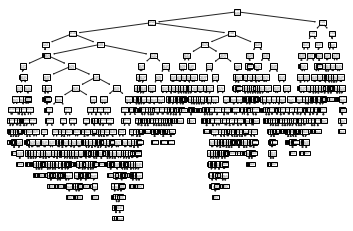

In [53]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

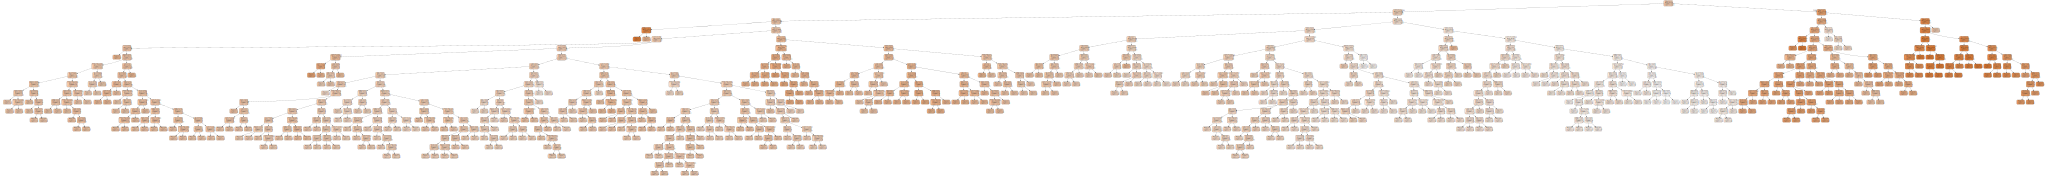

In [54]:
dot_data = tree.export_graphviz(decision_tree=model,
                               feature_names=boston.feature_names,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

##### 회귀식 시각화

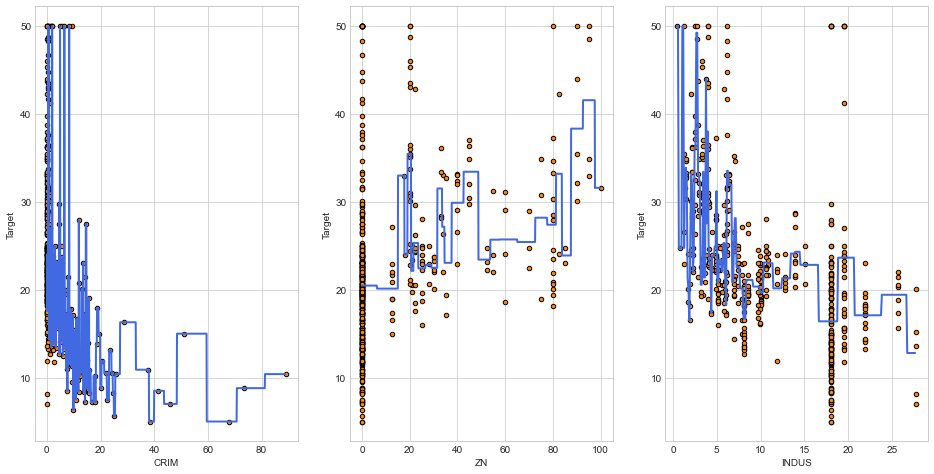

In [55]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0, 1, 2]):

    X = boston.data[:, pair].reshape(-1, 1)
    y = boston.target

    model = DecisionTreeRegressor()
    model.fit(X, y)
    
    X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
    predict = model.predict(X_test)

    plt.subplot(1, 3, pairidx + 1)
    plt.scatter(X, y, s=20, edgecolors="k", c="darkorange", label="data")
    plt.plot(X_test, predict, color="royalblue", linewidth=2)
    plt.xlabel(boston.feature_names[pair])
    plt.ylabel("Target")

##### 하이퍼파리미터를 변경해 보면서 회귀식 시각화

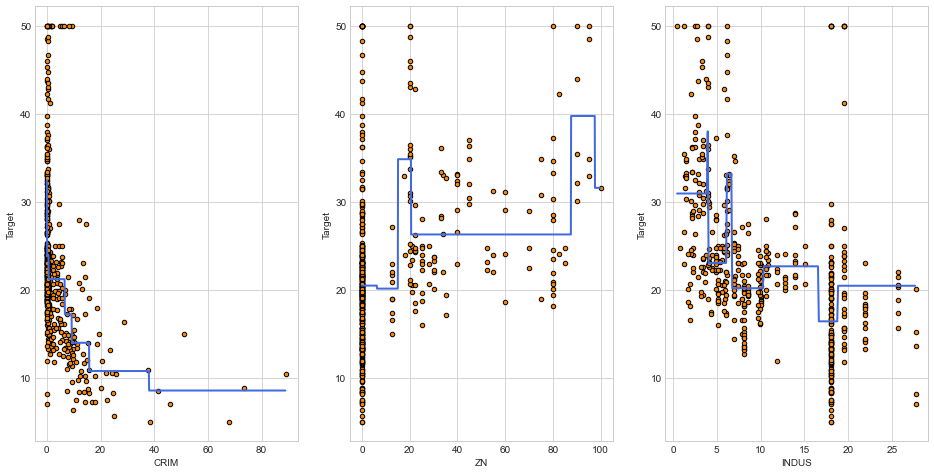

In [56]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0, 1, 2]):

    X = boston.data[:, pair].reshape(-1, 1)
    y = boston.target

    model = DecisionTreeRegressor(max_depth=3)
    model.fit(X, y)
    
    X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
    predict = model.predict(X_test)

    plt.subplot(1, 3, pairidx + 1)
    plt.scatter(X, y, s=20, edgecolors="k", c="darkorange", label="data")
    plt.plot(X_test, predict, color="royalblue", linewidth=2)
    plt.xlabel(boston.feature_names[pair])
    plt.ylabel("Target")

### 당뇨병 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [57]:
model = DecisionTreeRegressor()

In [58]:
cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

{'fit_time': array([0.00147605, 0.00153399, 0.00162721, 0.00187206, 0.00179505]),
 'score_time': array([0.00016785, 0.0002389 , 0.00028586, 0.00028276, 0.00066686]),
 'test_score': array([-0.4656144 , -0.10592926, -0.19317386,  0.11063403, -0.18902045])}

##### 전처리 후 학습

In [59]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor(),
)

In [60]:
cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

{'fit_time': array([0.00327921, 0.00191474, 0.00185394, 0.00197411, 0.00198483]),
 'score_time': array([0.00035   , 0.00027704, 0.00023103, 0.00075078, 0.0003171 ]),
 'test_score': array([-0.33747196, -0.05965318, -0.08645318, -0.0537967 , -0.23723597])}

#### 학습된 결정 트리 시각화

In [61]:
model = DecisionTreeRegressor()
model.fit(diabetes.data, diabetes.target)

DecisionTreeRegressor()

##### 텍스트를 통한 시각화

In [62]:
r = tree.export_text(model, feature_names=diabetes.feature_names)
print(r)

|--- s5 <= -0.00
|   |--- bmi <= 0.01
|   |   |--- s3 <= 0.02
|   |   |   |--- s2 <= 0.09
|   |   |   |   |--- sex <= 0.00
|   |   |   |   |   |--- bp <= -0.03
|   |   |   |   |   |   |--- age <= -0.05
|   |   |   |   |   |   |   |--- bp <= -0.09
|   |   |   |   |   |   |   |   |--- value: [55.00]
|   |   |   |   |   |   |   |--- bp >  -0.09
|   |   |   |   |   |   |   |   |--- bp <= -0.05
|   |   |   |   |   |   |   |   |   |--- s5 <= -0.06
|   |   |   |   |   |   |   |   |   |   |--- value: [200.00]
|   |   |   |   |   |   |   |   |   |--- s5 >  -0.06
|   |   |   |   |   |   |   |   |   |   |--- s5 <= -0.02
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- s5 >  -0.02
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- bp >  -0.05
|   |   |   |   |   |   |   |   |   |--- age <= -0.09
|   |   |   |   |   |   |   |   |   |   |--- value: [134.00]
|   |   

##### plot_tree를 사용한 시각화

[Text(178.7003280759419, 212.26285714285714, 'X[8] <= -0.004\nmse = 5929.885\nsamples = 442\nvalue = 152.133'),
 Text(102.88193436028257, 201.90857142857143, 'X[2] <= 0.006\nmse = 3240.821\nsamples = 218\nvalue = 109.986'),
 Text(68.92466149921508, 191.5542857142857, 'X[6] <= 0.021\nmse = 2143.968\nsamples = 171\nvalue = 96.31'),
 Text(38.44462323390895, 181.2, 'X[5] <= 0.091\nmse = 2856.847\nsamples = 87\nvalue = 108.805'),
 Text(29.761459968602825, 170.84571428571428, 'X[1] <= 0.003\nmse = 2496.899\nsamples = 85\nvalue = 105.682'),
 Text(14.497488226059655, 160.49142857142857, 'X[3] <= -0.035\nmse = 2955.72\nsamples = 39\nvalue = 118.846'),
 Text(7.883830455259027, 150.13714285714286, 'X[0] <= -0.051\nmse = 2357.959\nsamples = 21\nvalue = 100.429'),
 Text(2.8031397174254318, 139.78285714285715, 'X[3] <= -0.092\nmse = 2049.0\nsamples = 8\nvalue = 133.5'),
 Text(2.102354788069074, 129.42857142857144, 'mse = 0.0\nsamples = 1\nvalue = 55.0'),
 Text(3.5039246467817895, 129.42857142857144,

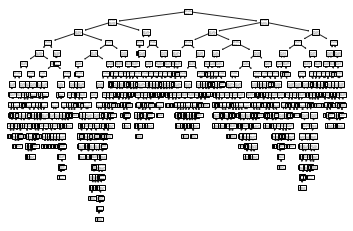

In [63]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

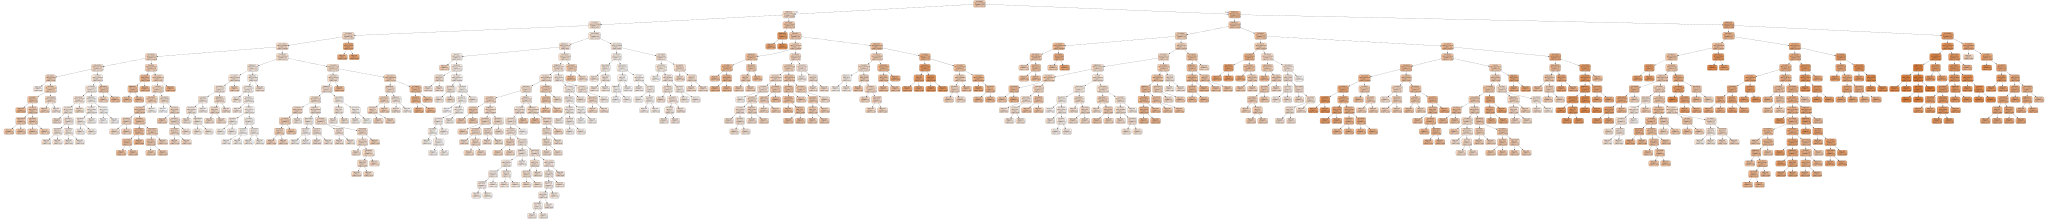

In [64]:
dot_data = tree.export_graphviz(decision_tree=model,
                               feature_names=diabetes.feature_names,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

##### 회귀식 시각화

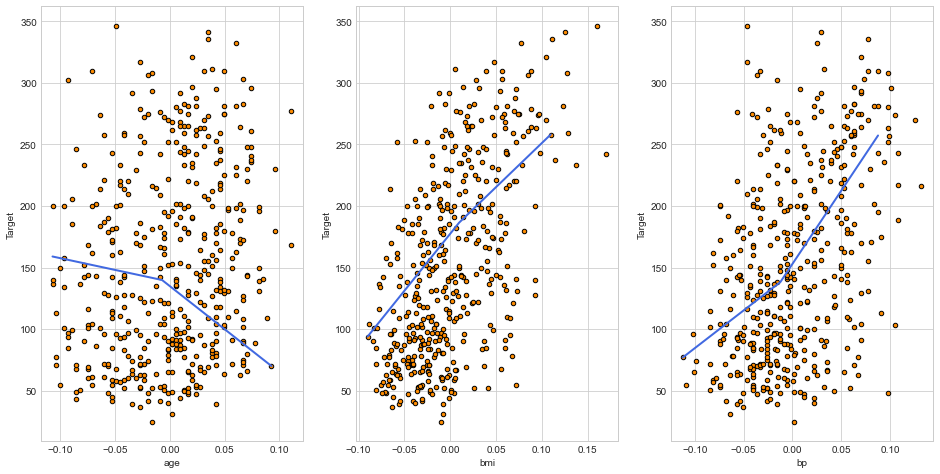

In [65]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0, 2, 3]):

    X = diabetes.data[:, pair].reshape(-1, 1)
    y = diabetes.target

    model = DecisionTreeRegressor()
    model.fit(X, y)
    
    X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
    predict = model.predict(X_test)

    plt.subplot(1, 3, pairidx + 1)
    plt.scatter(X, y, s=20, edgecolors="k", c="darkorange", label="data")
    plt.plot(X_test, predict, color="royalblue", linewidth=2)
    plt.xlabel(diabetes.feature_names[pair])
    plt.ylabel("Target")

##### 하이퍼파리미터를 변경해 보면서 회귀식 시각화

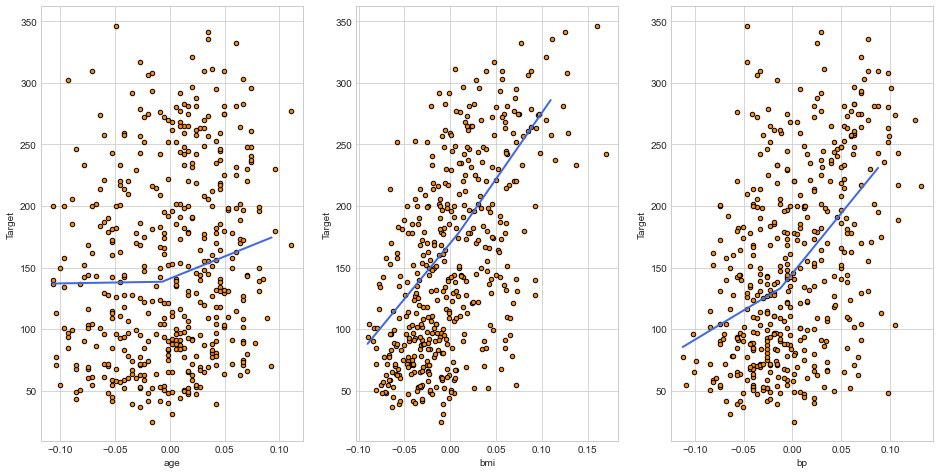

In [66]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0, 2, 3]):

    X = diabetes.data[:, pair].reshape(-1, 1)
    y = diabetes.target

    model = DecisionTreeRegressor(max_depth=3)
    model.fit(X, y)
    
    X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
    predict = model.predict(X_test)

    plt.subplot(1, 3, pairidx + 1)
    plt.scatter(X, y, s=20, edgecolors="k", c="darkorange", label="data")
    plt.plot(X_test, predict, color="royalblue", linewidth=2)
    plt.xlabel(diabetes.feature_names[pair])
    plt.ylabel("Target")